In [1]:
from sympy import *
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.optimize import minimize
import time
init_printing()

with open('Pantheon.txt') as f:
    for l in range(15):        
        c = l-9
        if c<0: c = 0        
        print('\t\t\x1b[38;5;'+str(239+c*3)+'m',next(f).strip(),'\x1b[0m') 
        
z,m,dm = np.loadtxt("Pantheon.txt", skiprows=1, usecols=(1,4,5), unpack=True)

index=z.argsort()
zaux=np.zeros(np.size(z))
maux=np.zeros(np.size(z))
dmaux=np.zeros(np.size(z))
for i in range(np.size(z)):
    zaux[i]=z[index[i]]
    maux[i]=m[index[i]]    
    dmaux[i]=dm[index[i]]
    
z,m,dm=zaux,maux,dmaux

		 #name zcmb zhel dz mb dmb 
		 03D1au 0.50309 0.50309 0.0 22.93445 0.12605 
		 03D1ax 0.4948 0.4948 0.0 22.8802 0.11765 
		 03D1co 0.67767 0.67767 0.0 24.0377 0.2056 
		 03D1ew 0.8665 0.8665 0.0 24.34685 0.17385 
		 03D1fq 0.79857 0.79857 0.0 24.3605 0.17435 
		 03D3ay 0.37144 0.37144 0.0 22.28785 0.1245 
		 03D3bl 0.35582 0.35582 0.0 22.05915 0.12645 
		 03D4ag 0.2836 0.2836 0.0 21.40915 0.1028 
		 03D4au 0.4664 0.4664 0.0 23.21635 0.1587 
		 03D4cx 0.94688 0.94688 0.0 24.41155 0.1642 
		 03D4cz 0.69315 0.69315 0.0 23.79645 0.24445 
		 03D4di 0.89693 0.89693 0.0 24.40275 0.16645 
		 03D4fd 0.78904 0.78904 0.0 24.2188 0.11585 
		 03D4gg 0.59027 0.59027 0.0 23.3354 0.1666 


In [11]:
def integrando (y, W, w):
    return 1/sqrt(W*(1+y)**3+(1-W)*(1+y)**(3*(1+w)))

def dL (z, W, w):
    return (1+z)*quad(lambda y: integrando(y, W, w),0,z )[0]
vdL=np.vectorize(dL)

In [13]:
dL(0.5,0.3,-1)

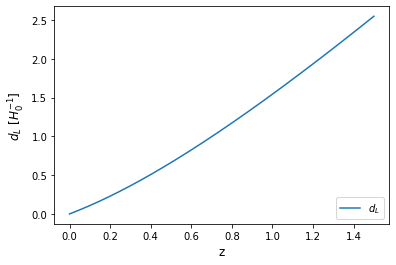

In [3]:
x=np.linspace(0,1.5,1000)
y=vdL(x,0.3,-1)
plt.plot(x, y,label='$d_L$')
plt.xlabel("z",fontsize = 12)
plt.ylabel("$d_L$ $[H_0^{-1}]$",fontsize = 12)
plt.legend(loc=4)
plt.show()

In [4]:
def X_m(W, w):
    vaux=(m-5*np.log10(vdL(z,W,w)))
    M=np.sum(vaux/dm**2)/np.sum(1/dm**2)
    return np.sum(((vaux-M)/dm)**2)

In [14]:
X_m(0.3,-1)

In [15]:
def X_mest(W):
    return X_m(W,-1)

minimize(X_mest, 0.3, method='Nelder-Mead')

 final_simplex: (array([[0.28453125],
       [0.28458984]]), array([1035.67915445, 1035.67917069]))
           fun: 1035.6791544543435
       message: 'Optimization terminated successfully.'
          nfev: 20
           nit: 10
        status: 0
       success: True
             x: array([0.28453125])

In [26]:
Wsolx=np.array([0.28453125])
X_msol=X_mest(Wsolx)
X_msol

In [17]:
def X_1(W):
    return X_mest(W)-X_mest(Wsolx)-1

In [27]:
fsolve(X_1,0.27), fsolve(X_1,0.29)

(array([0.27220612]), array([0.29713587]))

In [25]:
XES=X_mest(1)
XES

In [19]:
def dL2 (z,r):
    return (1+z)*quad(lambda y: integrando(y, r[0], r[1]),0,z )[0]

vdL2=np.vectorize(dL2)
vdL2.excluded.add(1)
def X_m2(r):
    vaux=(m-5*np.log10(vdL2(z,r)))
    M=np.sum(vaux/dm**2)/np.sum(1/dm**2)
    return np.sum((((vaux-M)/dm)**2))

minimize(X_m2, [0.285,-1], method='Nelder-Mead')

 final_simplex: (array([[ 0.35102248, -1.2385759 ],
       [ 0.35101029, -1.23850807],
       [ 0.35102666, -1.23857132]]), array([1032.46200061, 1032.4620007 , 1032.46200075]))
           fun: 1032.462000606276
       message: 'Optimization terminated successfully.'
          nfev: 70
           nit: 36
        status: 0
       success: True
             x: array([ 0.35102248, -1.2385759 ])

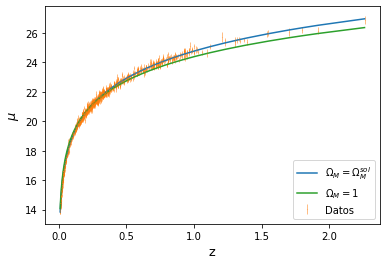

In [21]:
def mu(W):
    logaux=np.log10(vdL(z,W,-1))
    vaux=m-5*logaux
    M=np.sum(vaux/dm**2)/np.sum(1/dm**2)
    return 5*logaux+M

datamuSitter=mu(1)
datamusol=mu(Wsolx)

plt.plot(z, datamusol,label='$\Omega_M=\Omega_M^{sol}$')
plt.errorbar(z,m,yerr=dm,fmt='o',label='Datos',markersize=0.1,elinewidth=0.5)
plt.plot(z, datamuSitter,label='$\Omega_M=1$')
plt.xlabel("z",fontsize = 13)
plt.ylabel("$\mu$",fontsize = 13)
plt.legend(loc=4)
plt.show()

In [24]:
H0invvalue=4285
dist=dL(1,Wsolx,-1)*H0invvalue
dcom=dist/2
dist,dcom

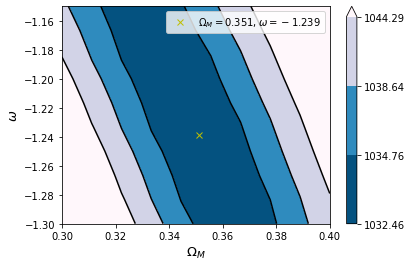

In [28]:
Xpsol=X_m(0.35102,-1.2385)
X1 = np.linspace(0.3,0.4,10)
Y1= np.linspace(-1.3,-1.15,10)
Z1 = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        Z1[j,i] = X_m(X1[i],Y1[j])
        
import matplotlib.colors as colors
xx1,yy1 = np.meshgrid(X1,Y1)
levels = Xpsol*np.ones(4)+[0,2.3,6.18,11.83]
plt.contour(xx1,yy1,Z1,levels,colors='k')
Fig1=plt.contourf(xx1,yy1,Z1,levels,extend='max', cmap='PuBu_r') 
plt.colorbar(Fig1)
plt.plot(0.35102,-1.2385,'yx',label='$\Omega_{M}=0.351, \omega=-1.239$') 
plt.legend();
plt.xlabel("$\Omega_M$", fontsize=13)
plt.ylabel("$\omega$", fontsize=13)
plt.show()

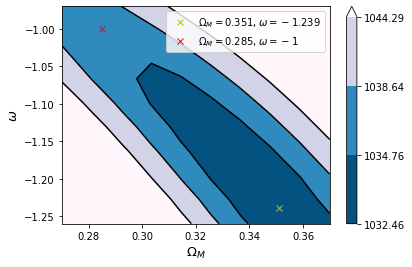

In [34]:
X2 = np.linspace(0.27,0.37,10)
Y2= np.linspace(-1.26,-0.97,10)
Z2 = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        Z2[j,i] = X_m(X2[i],Y2[j])
        
import matplotlib.colors as colors
xx2,yy2 = np.meshgrid(X2,Y2)
levels = Xpsol*np.ones(4)+[0,2.3,6.18,11.83]
plt.contour(xx2,yy2,Z2,levels,colors='k')
Fig2=plt.contourf(xx2,yy2,Z2,levels,extend='max', cmap='PuBu_r') 
plt.colorbar(Fig2)
plt.plot(0.35102,-1.2385,'yx',label='$\Omega_{M}=0.351, \omega=-1.239$') 
plt.plot(0.285,-1,'rx',label='$\Omega_{M}=0.285, \omega=-1$') 
plt.legend();
plt.xlabel("$\Omega_M$", fontsize=13)
plt.ylabel("$\omega$", fontsize=13)
plt.show()

<IPython.core.display.Javascript object>


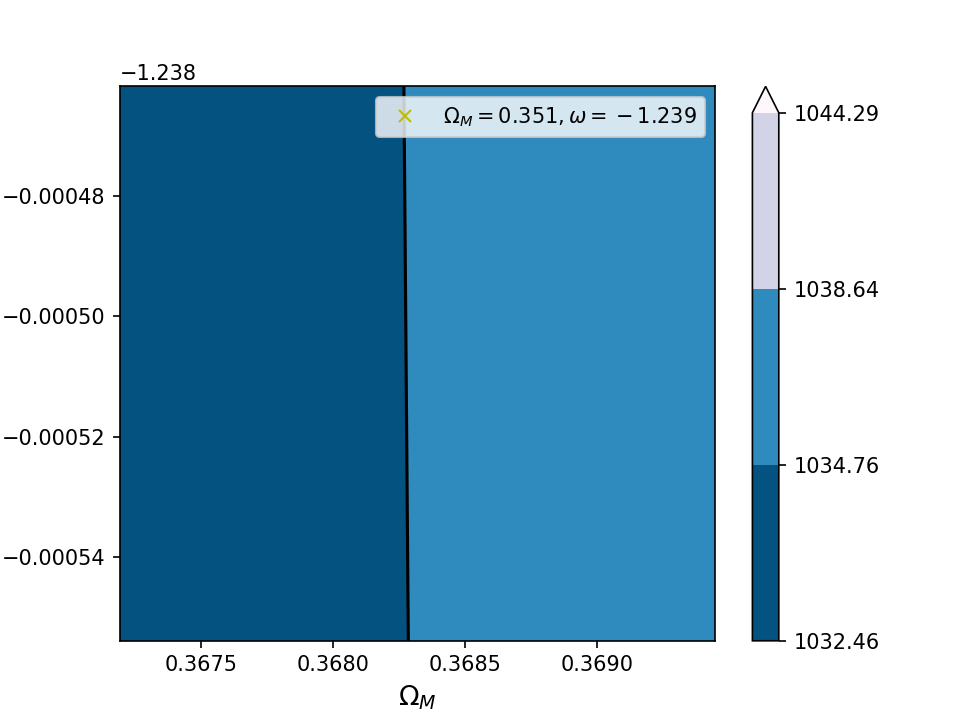

In [36]:
%matplotlib notebook
xx,yy = np.meshgrid(X1,Y1)
plt.contour(xx,yy,Z1,levels,colors='k')
Fig1=plt.contourf(xx,yy,Z1,levels,extend='max', cmap='PuBu_r') 
plt.colorbar(Fig1)
plt.plot(0.35102,-1.2385,'yx',label='$\Omega_{M}=0.351, \omega=-1.239$') 
plt.legend();
plt.xlabel("$\Omega_M$", fontsize=13)
plt.ylabel("$\omega$", fontsize=13)
plt.show()

In [37]:
%matplotlib inline